In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

df = pd.read_excel('./dataset/시도별 전출입 인구수.xlsx')
print(df.head())

# 데이터에 NaN 값이 존재하며, 이전 자료의 값으로 대체할 예정

df = df.fillna(method='ffill') # NaN이 나오면 이전 값으로 대체
df.head()

   전출지별   전입지별      1970      1971      1972      1973      1974      1975  \
0  전출지별   전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1    전국     전국   4046536   4210164   3687938   4860418   5297969   9011440   
2   NaN  서울특별시   1742813   1671705   1349333   1831858   2050392   3396662   
3   NaN  부산광역시    448577    389797    362202    482061    680984    805979   
4   NaN  대구광역시         -         -         -         -         -         -   

       1976      1977  ...      2008      2009      2010      2011      2012  \
0  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1   6773250   7397623  ...   8808256   8487275   8226594   8127195   7506691   
2   2756510   2893403  ...   2025358   1873188   1733015   1721748   1555281   
3    724664    785117  ...    514502    519310    519334    508043    461042   
4         -         -  ...    409938    398626    370817    370563    348642   

       2013      2014      2015      2016      201

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [15]:
# 전출지별이 '서울특별시'인 자료만 검색
mask= ( (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시'))
mask
df_seoul = df[mask]

# 전출지별 칼럼 삭제
df_seoul = df_seoul.drop('전출지별', axis=1)
df_seoul

# # 전입지별 -> 전입지로 변경
df_seoul.rename(columns = {'전입지별':'전입지'}, inplace=True)
df_seoul.head()

,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [16]:
# 전입지 컬럼을 인덱스로 설정
df_seoul.set_index('전입지', inplace=True)
df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


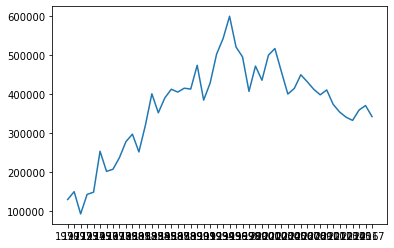

In [24]:
# 지금까지 한 일 정리
    # NaN 데이터를 처리 -> fillna(method='ffill') : 전출지별 데이터의 NaN을 이전자료로 대체
    # 전출지별이 서울 특별시인 자료만 추출
    # 전출지별 컬럼을 삭제
    # 전입지별 컬럼명을 전입지로 수정
    # 전입지 칼럼을 인덱스로 설정

# 이제 더 해야 할 일
    # 경기도로 전입한 인구수의 변화도를 그래프로 표현
sr_one = df_seoul.loc['경기도'] # series
sr_one
plt.plot(sr_one.index, sr_one.values) # x축 년도, y축 인구수